In [1]:
import numpy as np

In [2]:
import scipy

In [3]:
import tensorflow
import matplotlib
from matplotlib import pyplot as plt

In [4]:
import keras
import sklearn

Using TensorFlow backend.


In [5]:
#binary classification using logistic regression
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=7, n_clusters_per_class=1)
plot_data(X,y)
plt.show()
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=X, y=y, verbose=0, epochs=100)
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.show()
plot_decision_boundary(X, y, model, cmap='RdBu')

AttributeError: module 'sklearn' has no attribute 'datasets'

In [ ]:
#complex binary classifictaion using artificial neural network
from sklearn import datasets
X1, y1 = sklearn.datasets.make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
model1 = keras.Sequential()
model1.add(keras.layers.Dense(units=4, input_shape=(2,), activation='tanh'))
model1.add(keras.layers.Dense(units=16, activation='tanh'))
model1.add(keras.layers.Dense(units=1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x=X1, y=y1, verbose=0, epochs=50)
plot_decision_boundary(X1, y1, model1, cmap='RdBu')
plot_data(X1,y1)


In [ ]:
#testing logistic regression model on other inputs 

X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=3, n_clusters_per_class=1)
plot_data(X,y)
history = model.fit(x=X, y=y, verbose=0, epochs=150)
plot_decision_boundary(X, y, model, cmap='RdBu')
#print(history.history.keys())
plt.plot()

In [ ]:
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()


In [8]:
def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

In [ ]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

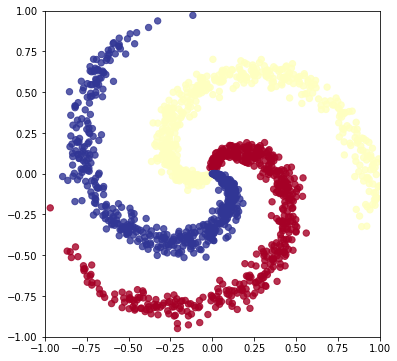

dict_keys(['loss', 'acc'])


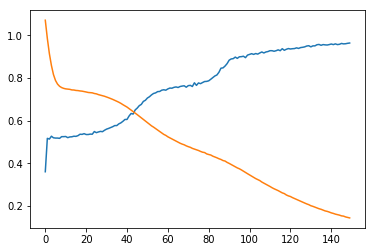

[0. 0. 0. ... 2. 2. 2.]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


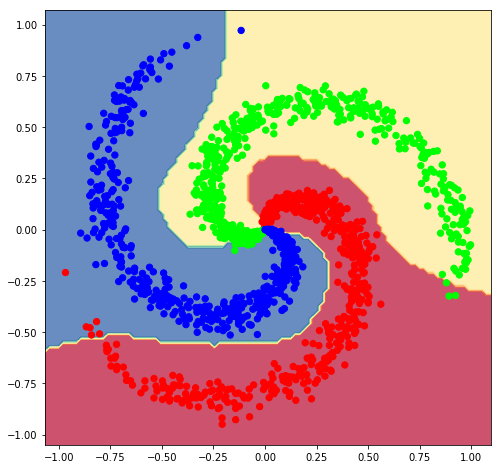

In [9]:
#multi class classification using deep neural network

X2,y2=make_multiclass()
plt.show()
model2 = keras.Sequential()

model2.add(keras.layers.Dense(units=4, input_shape=(2,), activation='tanh'))
model2.add(keras.layers.Dense(units=16, activation='tanh'))
model2.add(keras.layers.Dense(units=3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y2_cat=keras.utils.to_categorical(y2)
history2 = model2.fit(x=X2, y=y2_cat, verbose=0, epochs=150)
print(history2.history.keys())
plt.plot(history2.history['acc'])
plt.plot(history2.history['loss'])
plt.show()
print(y2)
print(y2_cat)
plot_multiclass_decision_boundary(model2, X2, y2_cat)

In [7]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df=pd.read_csv('nba_logreg.csv')

In [12]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


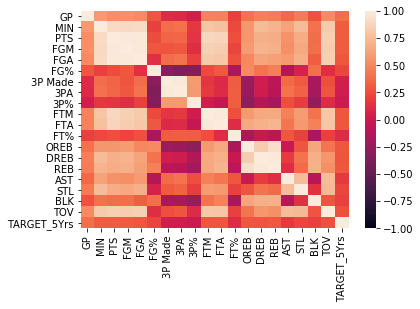

In [13]:
sns.heatmap(df.corr(), annot=False, vmax=1, vmin=-1)

In [14]:
import sklearn.preprocessing
ss=sklearn.preprocessing.StandardScaler()
df.fillna(0, inplace=True)
features=['GP','MIN','PTS','FGA','FG%','3P%','3PA','FT%','TOV']
df[features]=ss.fit_transform(df[features])
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,-1.400901,1.177066,0.137401,2.6,0.477347,-1.543407,0.5,1.244354,0.364603,...,2.3,-0.037855,0.7,3.4,4.1,1.9,0.4,0.4,0.147338,0.0
1,Andrew Harrison,-1.458281,1.116860,0.091486,2.0,0.226801,-2.374651,0.7,1.903829,0.271121,...,3.4,0.586286,0.5,2.0,2.4,3.7,1.1,0.5,0.562695,0.0
2,JaKarr Sampson,0.779563,-0.279912,-0.367659,2.0,-0.329969,-0.320991,0.4,0.867511,0.327210,...,1.3,-0.312099,0.5,1.7,2.2,1.0,0.5,0.3,-0.268019,0.0
3,Malik Sealy,-0.138527,-0.725434,-0.252873,2.3,-0.107261,-0.255795,0.1,-0.263016,0.215032,...,1.3,-0.132422,1.0,0.9,1.9,0.8,0.6,0.1,-0.268019,1.0
4,Matt Geiger,-0.712333,-0.737475,-0.528360,1.6,-0.803224,1.341496,0.0,-0.639859,-1.193430,...,1.9,-0.274272,1.0,1.5,2.5,0.3,0.3,0.4,-0.544923,1.0


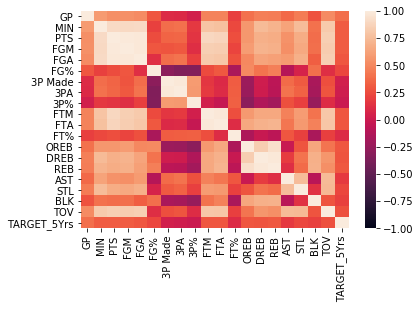

In [15]:
sns.heatmap(df.corr(), annot=False, vmax=1, vmin=-1)

In [16]:
del df['FGA']
del df['3PA']
del df['FTM']
del df['REB']

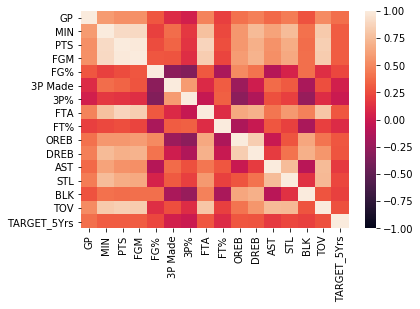

In [17]:
sns.heatmap(df.corr(), annot=False, vmax=1, vmin=-1)

In [32]:
del df['Name']
#del df['FGM']

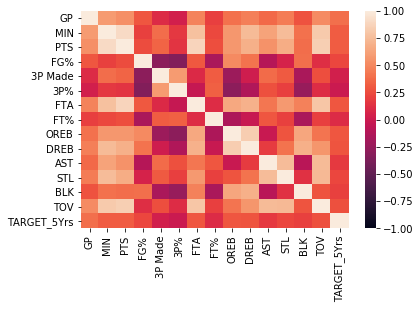

In [19]:
sns.heatmap(df.corr(), annot=False, vmax=1, vmin=-1)

In [23]:

features=[ 'FTA', 'OREB', 'DREB','3P Made', 'AST', 'STL', 'BLK']
df[features]=ss.fit_transform(df[features])
df.head()

,Name,GP,MIN,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,-1.400901,1.177066,0.137401,-1.543407,0.658041,0.364603,0.361484,-0.037855,-0.398290,1.010852,0.237640,-0.533458,0.073254,0.147338,0.0
1,Andrew Harrison,-1.458281,1.116860,0.091486,-2.374651,1.179494,0.271121,1.193248,0.586286,-0.655746,-0.018938,1.461613,1.175502,0.306415,0.562695,0.0
2,JaKarr Sampson,0.779563,-0.279912,-0.367659,-0.320991,0.397315,0.327210,-0.394665,-0.312099,-0.655746,-0.239607,-0.374347,-0.289321,-0.159906,-0.268019,0.0
3,Malik Sealy,-0.138527,-0.725434,-0.252873,-0.255795,-0.384863,0.215032,-0.394665,-0.132422,-0.012104,-0.828059,-0.510344,-0.045184,-0.626228,-0.268019,1.0
4,Matt Geiger,-0.712333,-0.737475,-0.528360,1.341496,-0.645589,-1.193430,0.059025,-0.274272,-0.012104,-0.386720,-0.850337,-0.777595,0.073254,-0.544923,1.0


In [34]:
X=df.drop('TARGET_5Yrs', axis=1).values

In [35]:
y=df['TARGET_5Yrs'].values

In [36]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test=sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train)

[[ 0.43527913 -0.36419948 -0.25287261 ...  0.44309079 -0.62622755
   0.70114679]
 [ 0.26313726  0.4305156  -0.11512899 ... -0.0451836   1.70537822
   0.14733795]
 [-0.94185583 -0.70135134 -0.91863343 ... -0.77759518 -0.39306697
  -0.68337531]
 ...
 [-0.42543022 -0.73747475 -0.27582988 ... -1.02173237 -0.39306697
   0.28579016]
 [-0.25328835  0.15356943 -0.48244531 ... -0.0451836   1.00589649
  -0.12956647]
 [-0.48281084 -0.11133559 -0.11512899 ... -0.77759518  0.77273591
  -0.82182752]]


In [37]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

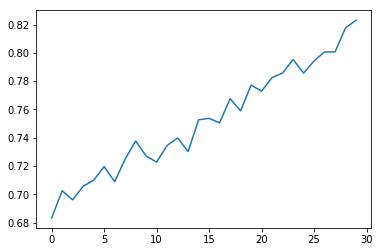

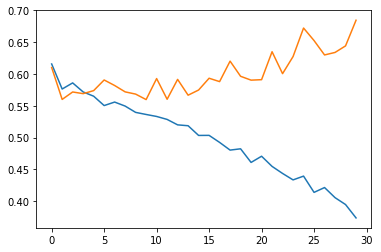

             precision    recall  f1-score   support

        0.0       0.81      0.77      0.79       347
        1.0       0.87      0.90      0.88       591

avg / total       0.85      0.85      0.85       938



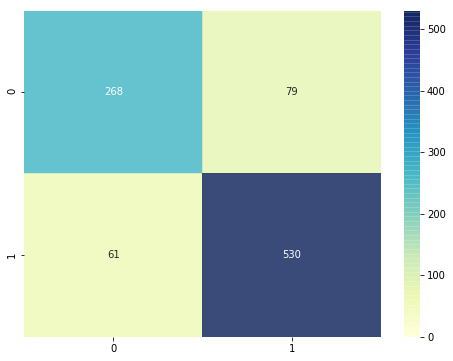

In [49]:
from keras.models import Sequential
from keras import layers,optimizers
model=Sequential()

#plot_data(X_train,Y_train)

#model.add(keras.layers.Dense(units=256, input_shape=(14,), activation='tanh'))
#model.add(keras.layers.Dense(units=256, input_shape=(14,),  activation='tanh'))
#model.add(keras.layers.Dense(units=128,input_shape=(14,),  activation='tanh'))
model.add(keras.layers.Dense(units=64,input_shape=(14,),  activation='tanh'))
model.add(keras.layers.Dense(units=32,  activation='tanh'))
#model.add(keras.layers.Dense(units=32, activation='tanh'))
#model.add(keras.layers.Dense(units=8,  activation='tanh'))
model.add(keras.layers.Dense(units=1,  activation='sigmoid'))

model.compile(keras.optimizers.adam(lr=0.01), 'binary_crossentropy', ['accuracy'])

history = model.fit(x=X_train, y=Y_train,validation_data=(X_test,Y_test),validation_split=0.2,verbose=0, epochs=30)

plt.plot(history.history['acc'], label='accuracy')
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()
"""plt.plot(history.history['val_acc'])
plt.show()
plt.plot(history.history['val_loss'])
plt.show()"""
#print(history.history.keys())
y_pred = model.predict_classes(X_train, verbose=0)
print(sklearn.metrics.classification_report(Y_train, y_pred))
plot_confusion_matrix(model, X_train, Y_train)

In [46]:
y_pred = model.predict_classes(X_test, verbose=0)
print(sklearn.metrics.classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.67      0.59      0.63       162
        1.0       0.74      0.80      0.77       240

avg / total       0.71      0.72      0.71       402



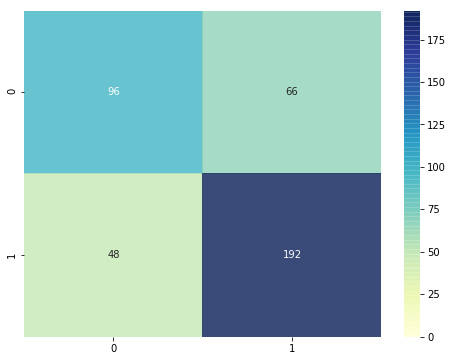

In [47]:
plot_confusion_matrix(model, X_test, Y_test)

In [48]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [1]:
import tensorflow

In [2]:
import keras

Using TensorFlow backend.


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14078981172196088129
]


In [4]:
sess = tensorflow.Session(config=tensorflow.ConfigProto(log_device_placement=True))

Device mapping:

